In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re

In [66]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
shoe_size_italy="Shoe Size IT"
pant_size='Pants Size Waist'

jacket_size='Jacket Size'
italy_jacket_size='Jacket Size IT'


demographic=[subject_number,gender,age, height, weight, shoe_size,pant_size,jacket_size]
italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pant_size,italy_jacket_size]

In [67]:
demographic_path = "../../dutch/demographic_metric.csv"
italy_demographic_path="../../italy/ItalyDemographics_csv.csv"

In [80]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
# measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
# measurement_data=measurement_data[mearuments]
demographic_data=demographic_data.loc[demographic_data[gender]=='Male'] #shape  Male (567,6) Female (700,6)
demographic_data.head()
# print(demographic_data.shape)# 567,8
demographic_data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
# print(demographic_data.shape) # 567
demographic_data=demographic_data[demographic_data[height].str.contains("No Response")==False]
demographic_data = demographic_data[demographic_data[weight].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[shoe_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[pants_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[jacket_size].str.contains("No Response") == False]
demographic_data = demographic_data[demographic_data[pants_size].str.contains("Don't Know") == False]
demographic_data = demographic_data[demographic_data[jacket_size].str.contains("Don't Know") == False]
demographic_data = demographic_data[demographic_data[pants_size].str.contains("75 or Smaller") == False]
demographic_data = demographic_data[demographic_data[jacket_size].str.contains("46 or Smaller") == False]
# print(demographic_data.shape) # 234
demographic_data[height] = pd.to_numeric(demographic_data[height])
demographic_data[weight]=pd.to_numeric(demographic_data[weight])
demographic_data[shoe_size]=pd.to_numeric(demographic_data[shoe_size])
demographic_data[pants_size]=pd.to_numeric(demographic_data[pants_size])
demographic_data[jacket_size]=pd.to_numeric(demographic_data[jacket_size])
features = demographic_data.columns.tolist()
target = features[-2:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-2]


In [81]:
italy_demographic_data=pd.read_csv(italy_demographic_path,skipinitialspace=True,usecols=italy_demographic)
# measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
# measurement_data=measurement_data[mearuments]
italy_demographic_data=italy_demographic_data.loc[italy_demographic_data[gender]=='Male'] #shape  Male (567,6) Female (700,6)
italy_demographic_data.head()
# print(demographic_data.shape)# 567,8
italy_demographic_data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
# print(demographic_data.shape) # 567

# italy_demographic_data=italy_demographic_data[italy_demographic_data[height].str.contains("No Response")==False]
# italy_demographic_data = italy_demographic_data[italy_demographic_data[weight].str.contains("No Response") == False]
italy_demographic_data=italy_demographic_data[italy_demographic_data[shoe_size_italy].str.contains("44 or Larger|35 or Smaller")==False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[shoe_size_italy].str.contains("No Response") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[pant_size].str.contains("No Response") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[italy_jacket_size].str.contains("No Response") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[pant_size].str.contains("Don't Know") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[italy_jacket_size].str.contains("Don't Know") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[italy_jacket_size].str.contains("46 or Smaller") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[italy_jacket_size].str.contains("58 or Larger") == False]
italy_demographic_data = italy_demographic_data[italy_demographic_data[pant_size].str.contains("29.5 or Smaller") == False]

# print(demographic_data.shape) # 234

# italy_demographic_data[height] = pd.to_numeric(italy_demographic_data[height])
# italy_demographic_data[weight]=pd.to_numeric(italy_demographic_data[weight])
italy_demographic_data[shoe_size_italy]=pd.to_numeric(italy_demographic_data[shoe_size_italy])
italy_demographic_data[pant_size]=pd.to_numeric(italy_demographic_data[pant_size])
italy_demographic_data[italy_jacket_size]=pd.to_numeric(italy_demographic_data[italy_jacket_size])
features_italy = italy_demographic_data.columns.tolist()
targe_italy = features_italy[-2:] #get last column

    #features = list(set(features) - set([target]))
features_italy = features_italy[:-2]
# target = features[-2:] #get last column

#     #features = list(set(features) - set([target]))
# features = features[:-2]


In [82]:
X_dutch = demographic_data[features]
y_dutch = demographic_data[target]
y_dutch.head()

,Jacket Size,Pants Size Waist
3,55,36
6,60,34
7,51,33
10,54,38
18,54,38


In [110]:
X_italy = italy_demographic_data[features_italy]
y_italy = italy_demographic_data[targe_italy]
y_italy.head()

,Jacket Size IT,Pants Size Waist
4,48,35.4
18,50,31.5
25,48,33.5
26,52,31.5
27,48,31.5


In [114]:
#Train and test
X_train_dutch,X_test_dutch,y_train_dutch,y_test_dutch=train_test_split(X_dutch,y_dutch,test_size=0.20,random_state=42)
#Train and validation

X_train_dutch,X_val_dutch,y_train_dutch,y_val_dutch=train_test_split(X_train_dutch,y_train_dutch,test_size=0.20,random_state=42)

# additional_df=pd.concat([X_test_dutch[subject_number],X_test_dutch[pants_size],X_test_dutch['shape']],axis=1)
X_test_dutch=X_test_dutch.drop(subject_number,axis=1)

# X_test_dutch=X_test_dutch.drop(pants_size,axis=1)
X_train_dutch=X_train_dutch.drop(subject_number,axis=1)

# X_train_dutch=X_train_dutch.drop(pants_size,axis=1)
X_val_dutch=X_val_dutch.drop(subject_number,axis=1)

# X_val_dutch=X_val_dutch.drop(pants_size,axis=1)

In [117]:
X_train_dutch.to_csv("./dutch/X_train.csv",encoding='utf-8',index=False)
y_train_dutch.to_csv("./dutch/y_train.csv",encoding='utf-8',index=False)

X_test_dutch.to_csv("./dutch/X_test.csv",encoding='utf-8',index=False)
y_test_dutch.to_csv("./dutch/y_test.csv",encoding='utf-8',index=False)

X_val_dutch.to_csv("./dutch/X_val.csv",encoding='utf-8',index=False)
y_val_dutch.to_csv("./dutch/y_val.csv",encoding='utf-8',index=False)

# additional_df.to_csv("additional_df.csv",encoding='utf-8',index=False)

In [118]:
#Train and test
X_train_italy,X_test_italy,y_train_italy,y_test_italy=train_test_split(X_italy,y_italy,test_size=0.20,random_state=42)
#Train and validation

X_train_italy,X_val_italy,y_train_italy,y_val_italy=train_test_split(X_train_italy,y_train_italy,test_size=0.20,random_state=42)

# additional_df=pd.concat([X_test_dutch[subject_number],X_test_dutch[pants_size],X_test_dutch['shape']],axis=1)
X_test_italy=X_test_italy.drop(subject_number,axis=1)

# X_test_dutch=X_test_dutch.drop(pants_size,axis=1)
X_train_italy=X_train_italy.drop(subject_number,axis=1)

# X_train_dutch=X_train_dutch.drop(pants_size,axis=1)
X_val_italy=X_val_italy.drop(subject_number,axis=1)

# X_val_dutch=X_val_dutch.drop(pants_size,axis=1)

In [119]:
X_train_italy.to_csv("./italy/X_train.csv",encoding='utf-8',index=False)
y_train_italy.to_csv("./italy/y_train.csv",encoding='utf-8',index=False)

X_test_italy.to_csv("./italy/X_test.csv",encoding='utf-8',index=False)
y_test_italy.to_csv("./italy/y_test.csv",encoding='utf-8',index=False)

X_val_italy.to_csv("./italy/X_val.csv",encoding='utf-8',index=False)
y_val_italy.to_csv("./italy/y_val.csv",encoding='utf-8',index=False)

# additional_df.to_csv("additional_df.csv",encoding='utf-8',index=False)

<AxesSubplot:>

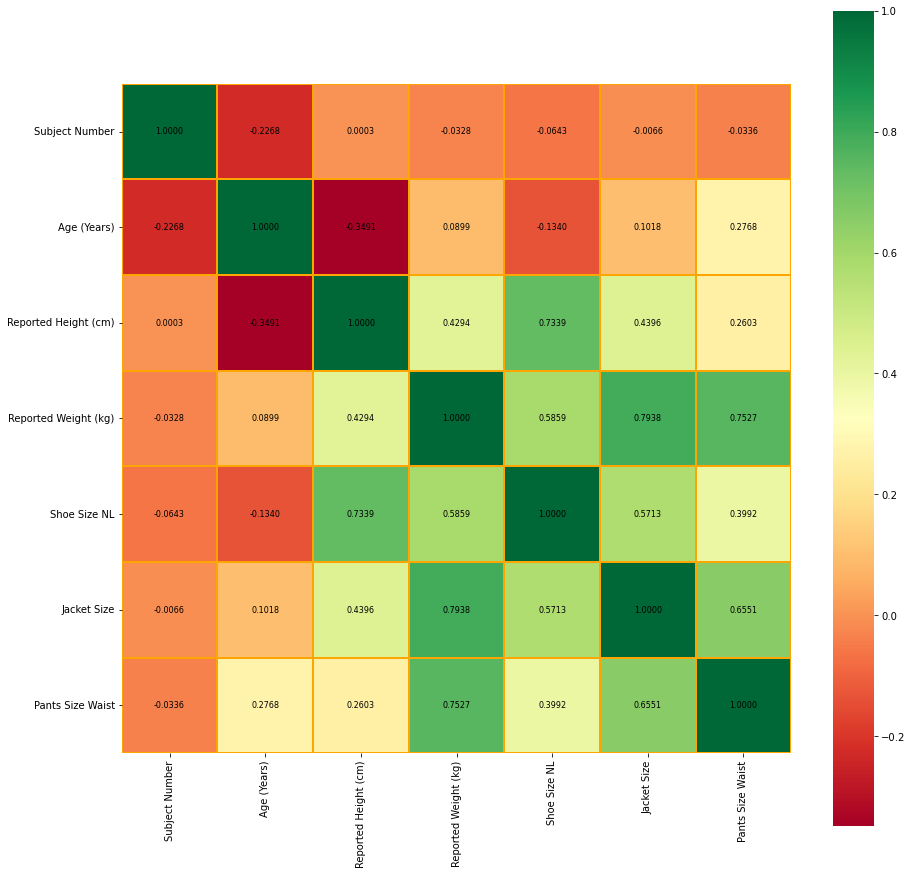

In [120]:
plt.figure(figsize=(15,15))
sns.heatmap(demographic_data.corr(),annot=True,cmap='RdYlGn',linewidths=2,linecolor='orange',annot_kws={'size':8,'color':'black'},fmt='.4f',square=True)